In [1]:
import os
print(os.listdir('flowers'))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


## Image Augumentation

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width = 180
data_dir = "flowers"

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)
x_train = train_datagen.flow_from_directory('flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

Found 4317 images belonging to 5 classes.


In [5]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("vertical",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

## Creating a Model

In [6]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()
training_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=57,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [7]:
validation_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=107,image_size=(img_height, img_width),batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [8]:
training_ds.class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

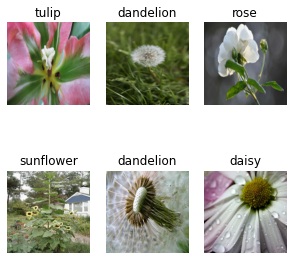

In [9]:
plt.figure(figsize=(5, 5))
for data, labels in training_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(data[i].numpy().astype("uint8"))
    plt.title(training_ds.class_names[labels[i]])
    plt.axis("off")

## Add Layers

In [10]:
'''a) Convolution layer'''

model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))


'''b) Maxpooling layer'''

model.add(MaxPooling2D(pool_size = (2,2)))

'''c) Flatten'''

model.add(Flatten())


'''d) Hidden/dense layers'''

model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu"))


'''e) Output layer'''

model.add(Dense(5, activation = "softmax"))

## Compiling Model

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Fit Model

In [12]:
model.fit(x_train, epochs = 15, steps_per_epoch = len(x_train))

Epoch 1/15
44/44 [==============================] - 56s 1s/step - loss: 1.4336 - accuracy: 0.4170
Epoch 2/15
44/44 [==============================] - 20s 447ms/step - loss: 1.1124 - accuracy: 0.5534
Epoch 3/15
44/44 [==============================] - 20s 456ms/step - loss: 1.0345 - accuracy: 0.5953
Epoch 4/15
44/44 [==============================] - 20s 451ms/step - loss: 0.9947 - accuracy: 0.6053
Epoch 5/15
44/44 [==============================] - 19s 425ms/step - loss: 0.9547 - accuracy: 0.6250
Epoch 6/15
44/44 [==============================] - 19s 419ms/step - loss: 0.9110 - accuracy: 0.6467
Epoch 7/15
44/44 [==============================] - 18s 412ms/step - loss: 0.8774 - accuracy: 0.6620
Epoch 8/15
44/44 [==============================] - 19s 427ms/step - loss: 0.8597 - accuracy: 0.6644
Epoch 9/15
44/44 [==============================] - 19s 428ms/step - loss: 0.8505 - accuracy: 0.6757
Epoch 10/15
44/44 [==============================] - 19s 419ms/step - loss: 0.8381 - accuracy:

## Save the model

In [13]:
model.save("flowers.h1")

INFO:tensorflow:Assets written to: flowers.h1\assets


INFO:tensorflow:Assets written to: flowers.h1\assets


## Test the model

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("flowers.h1")
daisy_img = image.load_img('flowers/daisy/100080576_f52e8ee070_n.jpg',target_size=(64,64))
x = image.img_to_array(daisy_img)
x = np.expand_dims(x,axis=0)
predicted_class=model.predict(x)
labels = ['daisy','dandelion','roses','sunflowers','tulips']
labels[np.argmax(predicted_class)]

1/1 [==============================] - 0s 110ms/step


'daisy'

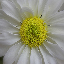

In [15]:
m=daisy_img
m